# Flyin' High

Find the probability that your seat is empty on a plane with n seats and n passengers, the first passenger ignoring his given seat number and sitting in a random seat. Each boarding passenger after the first can be modeled as a Bernoulli trial (either successfully sitting in their seat or failing and moving to a random seat).

 Suppose there are only two passengers and two seats. Then the first passenger chooses a seat randomly and you have a 1/2 chance of getting your seat. Suppose there are three passengers and three seats. Then there is a 1/3 chance that your seat is taken by the first passenger; if it is, then we have no chance of getting our own seat after the next passenger. But if the first passenger doesn't take our seat and instead chooses the next passenger's seat, then there is a 1/2 chance of getting our seat since the next passenger has to choose between our seat or the first passenger's seat. The third possibility is that the first passenger randomly chooses his own seat. This guarantees that we sit in our own seat. So our average of the three possibilities is (0+.5+1) / 3 = .5 or a 50% chance of getting our seat.

We might guess that the probability of getting our seat with 100 passengers is 50%. We could prove this mathematically but instead, let's run an experiment. With some code, we can pretend that 100 passengers in 10,000 alternate universes all got in a line and boarded a plane in this way. By coding this scenario, we can then modify it to ask all sorts of other questions.

Methodology:
- a passenger is just a seat number
- randomize a queue of passengers (seat numbers)
- create an array of n airplane seats
- the passenger takes a seat by setting that seat number equal to zero
- choose a random integer from the interval [1, n]
- assign the first passenger (seat number) to that spot
- iterate through the queue of passengers
    - if the seat number is set to zero (it's taken), move to a random nonzero seat
    - otherwise take a seat and set it to zero
- see if the last passenger gets their seat
- run 10,000 trials of this experiment and average the result to see the probability

In [1]:
# import statements
import numpy as np

In [2]:
def empty_seat(n=100, m=100):
    """
    Function that tells you if your seat is empty
    
    Input:
        n (int), number of passengers; defaults to 100
        m (int), number of seats on the plane; defaults to 100
    returns: empty_seat (bool), taken if 0 or empty if 1
    """
    # initialize the random queue of passengers implemented as a numpy array
    passengers = np.random.permutation(np.arange(1,n+1)) # 100 passengers with tickets 1-100
    
    #use these print statements for a play-by-play of what's happening for small values of n
    #print("First Passenger has ticket %d") % passengers[0]
    #print("Last Passenger has ticket %d") % passengers[-1]
    
    # initialize the airplane seats
    seats = np.arange(1,m+1) # 1-100
    first_seat = np.random.randint(1,m+1) # choose from any random seat 1-100
    seats[first_seat-1] = 0 # this indicates that the first passenger took a random seat
    
    #print("First Passenger %d took seat %d = %d") % (passengers[0], first_seat, seats[first_seat-1])
    
    for p in passengers[1:-1]:
        leftover_seats = seats.ravel()[np.flatnonzero(seats)] # the remaining seats
        #print(leftover_seats)
        if seats[p-1] == 0: # the passenger p's seat is taken
            #print("seat %d taken") % p
            i = np.random.randint(0,len(leftover_seats)) # choose a random seat (by index)
            new_seat = leftover_seats[i]
            seats[new_seat-1] = 0 # this seat is taken
            #print("passenger %d took seat %d = %d") % (p, new_seat, seats[new_seat-1])
        else:
            if seats[p-1] == p:
                # this checks to make sure the ticket is correct and passenger takes their seat
                pseat = seats[p-1]
                seats[p-1] = 0
                #print("passenger %d took seat %d = %d") % (p, pseat, seats[p-1])
            else:
                # something is wrong, raise an error
                print(p)
                raise ValueError("seat number empty but not correct")
    #the_rest = seats.ravel()[np.flatnonzero(seats)]
    #print(the_rest)
    #print(passengers[-1])
    if seats[passengers[-1]-1] == 0:
        #print("your seat was taken")
        return 0
    else:
        #print("Your seat is empty")
        return 1

In [3]:
def experiment(n=100, m=100, trials=10000):
    """returns an average probability from a given number of trials and number of seats.
    Inputs:
        n (int) defaults to 100
        m (int) defaults to 100
        trials (int) defaults to 10,000
    returns the probability of getting your seat
    """
    P = []
    for x in xrange(trials):
        #print("\n\n\tNEW TRIAL")
        P.append(empty_seat(n,m))
    return float(sum(P))/trials

In [14]:
# run the experiment!
print(experiment())

0.4992


**But not all airplanes are full...**

What if some passengers didn't make the flight? The Boeing 747-400 passenger aircraft has a passenger capacity of 416 (according to Wikipedia). Let's say that 85% of people make their flights on this kind of aircraft. Now let's look at the probability that the last passenger's seat is empty.

In [5]:
# multiply the number of people by .85
n = int(416*.85)
# keep the number of seats the same
m = 416
print(experiment(n, m))

0.9827


The probability is substantially higher. This should make sense since there are a lot more seats to choose from. We will end by considering the probability that the last passenger's seat is empty if 75, 85, 90, 95, and 99 percent of people make their flight.

In [6]:
# 90% of people make their flight
percentages = [.75, .85, .9, .95, .99, .999, 1.]
L = [] # the list of percentages
for i in percentages:
    n = int(416*i)
    m = 416
    L.append(experiment(n,m))

[0.9915, 0.9844, 0.9795, 0.9561, 0.8643, 0.6653, 0.4987]


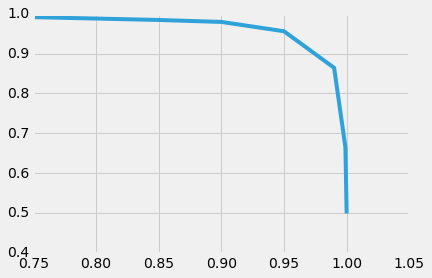

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
print(L)
#plot the results for several percentage values
plt.plot(percentages, L)

Even if just one person doesn't get on the plane, your odds improve significantly (from 50% to about 66%). Pretty cool!